In [1]:
%pip install tensorflow
%pip install keras
%pip install imblearn
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow-addons
%pip install vit_keras
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### <font color=purple> import libraries </font>

In [2]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.initializers import GlorotUniform
from keras.models import Sequential
from keras.models import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import GroupNormalization
from tensorflow.keras.layers import Attention

from vit_keras import vit, utils

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek

#   Optimizer
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_curve, auc
from itertools import cycle

c:\Users\rahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\rahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encoun

### <font color=purple> Define dataset and rescale images </font> 

In [3]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "C:/Users/rahil/OneDrive/Desktop/Dataset"

##  Name of classes 
CLASSES = ['MildDemented',
           'ModerateDemented',
           'NonDemented',
           'VeryMildDemented']

X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(176, 208),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Found 6400 images belonging to 4 classes.
Images shape :	 (6400, 176, 208, 3)
Labels shape :	 (6400, 4)


### <font color=purple> Define unbalanced testing data </font> 

In [4]:
#   reshaping the images to 1D
X = X.reshape(-1, 176 * 208 * 3)

# create unbalanced dataset and dataset used in rebalancing
X, unbal_x, y, unbal_y = train_test_split(X, y, test_size=0.1)
unbal_x = unbal_x.reshape(-1, 176, 208, 3)

# unbalanced data
unbalanced_samples = len(unbal_x)
print("Number of samples in unbalanced dataset: \t", sorted(Counter(np.argmax(unbal_y, axis = 1)).items()))



Number of samples in unbalanced dataset: 	 [(0, 88), (1, 3), (2, 311), (3, 238)]


### <font color=purple> SMOTETOMEK rebalance the remaining data </font> 

In [5]:
#   Oversampling method to remove imbalance class problem
X, y = SMOTETomek().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, 176, 208, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after SMOTETomek :	 [(0, 2889), (1, 2889), (2, 2889), (3, 2889)]


### <font color=purple> Split balanced dataset for training, validation, and testing </font> 

In [6]:
#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))
print("Unbalanced\t",sorted(Counter(np.argmax(unbal_y, axis=1)).items()))

del X, y

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 1849), (1, 1861), (2, 1855), (3, 1830)]
Validation	 [(0, 583), (1, 556), (2, 584), (3, 589)]
Test      	 [(0, 457), (1, 472), (2, 450), (3, 470)]
Unbalanced	 [(0, 88), (1, 3), (2, 311), (3, 238)]


## **<font color=orange> ViT Model: ViT implementation for the classification of AD using MRIs </font>**

### <font color=Orange> Network Architecture </font> 
 

In [7]:

init = 'glorot_uniform'

# Define the ViT model
vit_block = vit.vit_b16(
    image_size=(176,208),
    activation='ReLU',
    classes = 4,
    pretrained=True,
    include_top=False,  
    pretrained_top=False,
)

# Create a Sequential model and add the ViT model
ViT_Model = Sequential()

# Add the ViT model as the first layer
ViT_Model.add(vit_block)

# Add a GlobalAveragePooling2D layer if needed
ViT_Model.add(Flatten())
ViT_Model.add(Dense(256, kernel_initializer=init))
ViT_Model.add(ReLU())
ViT_Model.add(Dropout(0.03))

ViT_Model.add(Dense(4, kernel_initializer=init))
ViT_Model.add(Softmax())

# Display the model summary
vit_block.summary()
ViT_Model.summary()
#ViTRecallNet.summary()


c:\Users\rahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 13, 11
  warnings.warn(


Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 11, 13, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 143, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 144, 768)          768       
                                                                 
 Transformer/posembed_input  (None, 144, 768)          110592    
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 144, 768),        7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [9]:
### Model Compilation
ViT_Model.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'), 
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'), 
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=4),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])

In [10]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=3)

CALLBACKS = [rop_callback]

In [13]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 8

history = ViT_Model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch=len(X_train) // batch_size,
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps=len(x_test) // batch_size,
epochs= 8,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/8


924/924 [==============================] - 1710s 2s/step - loss: 0.5601 - acc: 0.7410 - auc: 0.9412 - f1_score: 0.7379 - precision: 0.7835 - recall: 0.6862 - val_loss: 0.4151 - val_acc: 0.8198 - val_auc: 0.9682 - val_f1_score: 0.8160 - val_precision: 0.8519 - val_recall: 0.7873 - lr: 0.0100
Epoch 2/8
924/924 [==============================] - 1724s 2s/step - loss: 0.4160 - acc: 0.8193 - auc: 0.9677 - f1_score: 0.8182 - precision: 0.8398 - recall: 0.7957 - val_loss: 0.2676 - val_acc: 0.8918 - val_auc: 0.9875 - val_f1_score: 0.8937 - val_precision: 0.9019 - val_recall: 0.8810 - lr: 0.0100
Epoch 3/8
924/924 [==============================] - 1725s 2s/step - loss: 0.2952 - acc: 0.8756 - auc: 0.9834 - f1_score: 0.8746 - precision: 0.8837 - recall: 0.8642 - val_loss: 0.2338 - val_acc: 0.9113 - val_auc: 0.9898 - val_f1_score: 0.9129 - val_precision: 0.9154 - val_recall: 0.9075 - lr: 0.0100
Epoch 4/8
924/924 [==============================] - 1724s 2s/step - loss: 0.2236 - acc: 0.9086 - auc: 0

### <font color=Orange> Evaluation using balanced test data </font> 

In [14]:
### Evaluate Model
test_scores = ViT_Model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AUC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

58/58 [==============================] - 118s 2s/step - loss: 0.0820 - acc: 0.9740 - auc: 0.9980 - f1_score: 0.9738 - precision: 0.9746 - recall: 0.9740


Testing Loss : 		 0.082042
Testing Accuracy : 	 97.404003 %
Testing AUC : 		 99.795556 %
Testing F1-Score : 	 97.380304 %
Testing Precision : 	 97.456712 %
Testing Recall : 	 97.404003 %


In [15]:
pred_labels = ViT_Model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))

58/58 [==============================] - 121s 2s/step
                  precision    recall  f1-score   support

    MildDemented       0.99      1.00      0.99       457
ModerateDemented       1.00      1.00      1.00       472
     NonDemented       0.98      0.92      0.95       450
VeryMildDemented       0.93      0.98      0.95       470

       micro avg       0.97      0.97      0.97      1849
       macro avg       0.97      0.97      0.97      1849
    weighted avg       0.97      0.97      0.97      1849
     samples avg       0.97      0.97      0.97      1849



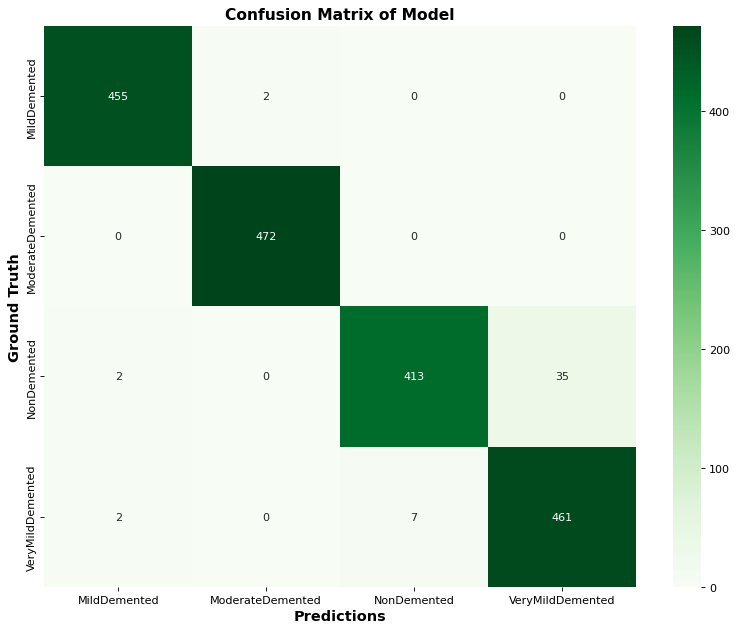

In [16]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

### <font color=Orange> Evaluation using unbalanced test data </font> 

In [17]:
## evaluation with unbalanced data
unbal_scores = ViT_Model.evaluate(unbal_x, unbal_y, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(unbal_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(unbal_scores[1] * 100))
print("Testing AUC : \t\t {0:0.6f} %".format(unbal_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((unbal_scores[3][0] + unbal_scores[3][1] + unbal_scores[3][2] + unbal_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(unbal_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(unbal_scores[5] * 100))

20/20 [==============================] - 42s 2s/step - loss: 0.2511 - acc: 0.9141 - auc: 0.9886 - f1_score: 0.9388 - precision: 0.9182 - recall: 0.9125


Testing Loss : 		 0.251072
Testing Accuracy : 	 91.406250 %
Testing AUC : 		 98.861933 %
Testing F1-Score : 	 93.877947 %
Testing Precision : 	 91.823900 %
Testing Recall : 	 91.250002 %


In [18]:
pred_labels_unbal = ViT_Model.predict(unbal_x, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels_unbal in pred_labels_unbal:
    labels_unbal = roundoff(labels_unbal)

print(classification_report(unbal_y, pred_labels_unbal, target_names=CLASSES))

20/20 [==============================] - 40s 2s/step
                  precision    recall  f1-score   support

    MildDemented       0.94      0.93      0.94        88
ModerateDemented       1.00      1.00      1.00         3
     NonDemented       0.97      0.88      0.92       311
VeryMildDemented       0.85      0.95      0.90       238

       micro avg       0.91      0.91      0.91       640
       macro avg       0.94      0.94      0.94       640
    weighted avg       0.92      0.91      0.91       640
     samples avg       0.91      0.91      0.91       640



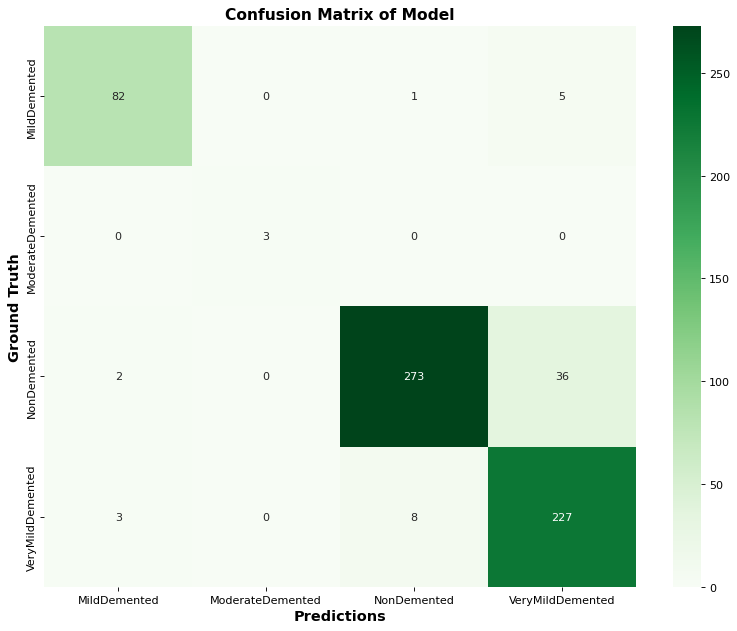

In [19]:
pred_ls_unbal = np.argmax(pred_labels_unbal, axis=1)
test_ls_unbal = np.argmax(unbal_y, axis=1)

conf_arr_unbal = confusion_matrix(test_ls_unbal, pred_ls_unbal)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr_unbal, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)